<a href="https://colab.research.google.com/github/namirafr/Resize-Code-Phyton/blob/main/CodeResize32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Colab-Notebook

/content/drive/My Drive/Colab-Notebook


In [4]:
ls

DatasetMobil/  Vehicle-Dataset/


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from keras import backend as K
from imutils import paths
from keras.layers import Dropout
import numpy as np
import os

In [6]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Vehicle-Dataset")
data = []
labels = []

[INFO] loading images...


In [7]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((32, 32))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle', 'Multi Purpose Vehicle',

In [9]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
print(labels)

[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [11]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),
	np.array(labels), test_size=0.2)
print(trainX.shape)
print(testX.shape)

(5604, 32, 32, 3)
(1401, 32, 32, 3)


In [16]:
#MODEL 1
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(32, 32, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4))
model.add(Activation("softmax"))

In [17]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
activation_5 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=0.91):
      print("\nReached 90.0% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [19]:
#training data
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=30)

Epoch 1/100
187/187 [==============================] - 15s 75ms/step - loss: 0.4918 - accuracy: 0.4365 - val_loss: 0.4177 - val_accuracy: 0.6046
Epoch 2/100
187/187 [==============================] - 14s 75ms/step - loss: 0.3895 - accuracy: 0.6155 - val_loss: 0.3633 - val_accuracy: 0.6674
Epoch 3/100
187/187 [==============================] - 14s 75ms/step - loss: 0.3438 - accuracy: 0.6786 - val_loss: 0.3205 - val_accuracy: 0.7081
Epoch 4/100
187/187 [==============================] - 14s 75ms/step - loss: 0.3120 - accuracy: 0.7206 - val_loss: 0.2975 - val_accuracy: 0.7466
Epoch 5/100
187/187 [==============================] - 14s 76ms/step - loss: 0.2890 - accuracy: 0.7520 - val_loss: 0.2883 - val_accuracy: 0.7323
Epoch 6/100
187/187 [==============================] - 14s 76ms/step - loss: 0.2685 - accuracy: 0.7719 - val_loss: 0.2641 - val_accuracy: 0.7909
Epoch 7/100
187/187 [==============================] - 14s 76ms/step - loss: 0.2492 - accuracy: 0.7925 - val_loss: 0.2495 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


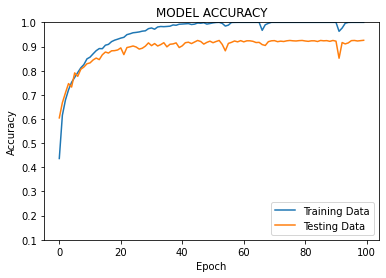

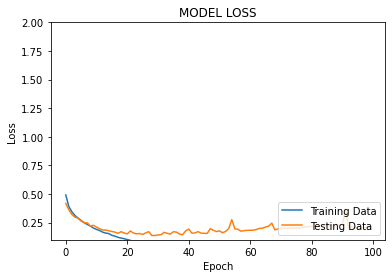

In [20]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='lower right')
X = np.linspace(0, 100, 100)
plt.ylim(.1, 1)
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='lower right')
X = np.linspace(0, 100, 100)
plt.ylim(.1, 2)
plt.show()

In [21]:
# evaluate the network
print("[INFO] evaluating network...")
target_names=['Big Truck','Multi Purpose Vehicle','Sedan','Truck']
predictions = model.predict(testX, batch_size=32)
print(predictions)
print(testY)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=target_names))

[INFO] evaluating network...
[[1.5967179e-20 1.7590888e-16 6.7644485e-14 1.0000000e+00]
 [4.3113323e-29 1.5590989e-28 1.0000000e+00 4.2368922e-27]
 [1.1199309e-28 3.5786568e-35 2.6425430e-28 1.0000000e+00]
 ...
 [1.4236554e-26 1.0000000e+00 1.5251752e-12 3.0432356e-14]
 [2.5153058e-14 4.0837254e-02 9.5916271e-01 5.8741045e-15]
 [5.1458966e-21 1.0000000e+00 2.1145034e-10 6.5577030e-18]]
[[0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 ...
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]]
                       precision    recall  f1-score   support

            Big Truck       0.92      0.95      0.94       106
Multi Purpose Vehicle       0.91      0.92      0.91       518
                Sedan       0.93      0.91      0.92       544
                Truck       0.96      0.97      0.96       233

             accuracy                           0.93      1401
            macro avg       0.93      0.94      0.93      1401
         weighted avg       0.93      0.93      0.93      1401



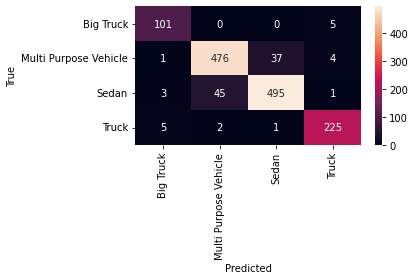

In [22]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
x_axis_labels = ['Big Truck','Multi Purpose Vehicle','Sedan','Truck']
y_axis_labels = ['Big Truck','Multi Purpose Vehicle','Sedan','Truck']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()